# GRIP : The Sparks Foundation

# Task-1 Prediction using Supervised ML - Student Percentage Prediction

## Author: Lokeswar Reddy Bollavaram

### Objective: Predict the percentage of an student based on the no. of hours studied

<h6> Step1 : Importing the basic modules required </h6> 

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<h6> Step2 : Load csv data into DataFrame and Work on basic stats of the data</h6> 

In [60]:
df = pd.read_csv('student_data.csv')

In [61]:
df.shape

(25, 2)

In [62]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [63]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h6> Step3 : Plot the Data Hours Vs Scores </h6> 

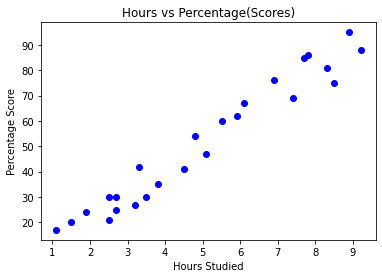

In [65]:
plt.plot(df.Hours,df.Scores,'bo')
plt.title('Hours vs Percentage(Scores)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<h6> Step4 : Preparing the data </h6> 

In [66]:
X = df.drop(['Scores'],axis='columns').values

In [67]:
y = df['Scores'].values

In [79]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h6> Step5 : Training the Algorithm </h6>

In [80]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  

model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


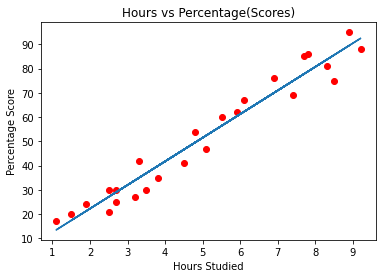

In [81]:
# Plotting the regression line(y = mx + c)

m = model.coef_
c = model.intercept_

line = m*X + c

# Plotting for the test data
plt.scatter(X, y,color='r')
plt.plot(X, line);
plt.title('Hours vs Percentage(Scores)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<h6> Step6 : Making Predictions</h6>

In [82]:
y_pred = model.predict(X_test) # Predicting the scores

In [83]:
hours = np.resize(X_test,5)

In [84]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Hours': hours,'Actual': y_test, 'Predicted': y_pred, 'Difference or Error':abs(y_pred-y_test)})  
df 

,Hours,Actual,Predicted,Difference or Error
0,1.1,17,13.502378,3.497622
1,5.1,47,52.501192,5.501192
2,3.8,35,39.826577,4.826577
3,8.3,81,83.700244,2.700244
4,8.9,95,89.550066,5.449934


In [85]:
# We can also test with your own data using formula y = mx + c

m = model.coef_
c = model.intercept_

yhat = m*9.25 + c

print("Predicted Percentage of the Student if he study for 9.25 hrs/day is :",yhat)

Predicted Percentage of the Student if he study for 9.25 hrs/day is : [92.96246236]


In [86]:
# We can also test with your own data
hours = pd.DataFrame([9.25])
own_pred = model.predict(hours.values)
print("No of Hours/Day the student studied = {} hrs".format(hours.values[0][0]))
print("Predicted Percentage of the student = {} %".format(round(own_pred[0],2)))


No of Hours/Day the student studied = 9.25 hrs
Predicted Percentage of the student = 92.96 %


<h6> Step7 : Evaluating the model </h6>

In [87]:
model.score(X,y)

0.9528980056983176

In [88]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.395113975447247
